In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import random
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
import subprocess
from IPython.display import FileLink, display
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_dir = "../input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"
image_size = (224,224)
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = '/kaggle/input/new-plant-diseases-dataset/test/test'
# Define the new base directory structure
base_output_dir = '/kaggle/working/dataset'
output_train_dir = os.path.join(base_output_dir, 'train')
output_valid_dir = os.path.join(base_output_dir, 'valid')
output_test_dir = os.path.join(base_output_dir, 'test')

# Create the output directories
os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_valid_dir, exist_ok=True)
os.makedirs(output_test_dir, exist_ok=True)

# Copy the training set
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):  # Ensure it's a directory
        # Create the class directory in the output train directory
        output_class_path = os.path.join(output_train_dir, class_folder)
        os.makedirs(output_class_path, exist_ok=True)
        
        # Copy all images to the new class directory
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if os.path.isfile(img_path):  # Ensure it's a file
                shutil.copy(img_path, output_class_path)

# Copy the validation set
for class_folder in os.listdir(valid_dir):
    class_path = os.path.join(valid_dir, class_folder)
    if os.path.isdir(class_path):  # Ensure it's a directory
        # Create the class directory in the output valid directory
        output_class_path = os.path.join(output_valid_dir, class_folder)
        os.makedirs(output_class_path, exist_ok=True)
        
        # Copy all images to the new class directory
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if os.path.isfile(img_path):  # Ensure it's a file
                shutil.copy(img_path, output_class_path)


print("Dataset has been reorganized and moved to /kaggle/working/dataset")



Dataset has been reorganized and moved to /kaggle/working/dataset


In [3]:
train_dir = '/kaggle/working/dataset/train'
valid_dir = '/kaggle/working/dataset/valid'
test_dir = '/kaggle/working/dataset/test'

os.makedirs(test_dir, exist_ok=True)

split_ratio = 0.2 


for class_name in os.listdir(valid_dir):
    class_valid_dir = os.path.join(valid_dir, class_name)
    class_test_dir = os.path.join(test_dir, class_name)

    os.makedirs(class_test_dir, exist_ok=True)

    images = [f for f in os.listdir(class_valid_dir) if os.path.isfile(os.path.join(class_valid_dir, f))]
    
    random.shuffle(images)
    num_test_images = int(len(images) * split_ratio)
    test_images = images[:num_test_images]

    for image in test_images:
        src_path = os.path.join(class_valid_dir, image)
        dest_path = os.path.join(class_test_dir, image)
        shutil.move(src_path, dest_path)

    print(f"Moved {len(test_images)} images from '{class_valid_dir}' to '{class_test_dir}'")


Moved 88 images from '/kaggle/working/dataset/valid/Strawberry___Leaf_scorch' to '/kaggle/working/dataset/test/Strawberry___Leaf_scorch'
Moved 91 images from '/kaggle/working/dataset/valid/Strawberry___healthy' to '/kaggle/working/dataset/test/Strawberry___healthy'
Moved 84 images from '/kaggle/working/dataset/valid/Grape___healthy' to '/kaggle/working/dataset/test/Grape___healthy'
Moved 94 images from '/kaggle/working/dataset/valid/Grape___Black_rot' to '/kaggle/working/dataset/test/Grape___Black_rot'
Moved 95 images from '/kaggle/working/dataset/valid/Corn_(maize)___Common_rust_' to '/kaggle/working/dataset/test/Corn_(maize)___Common_rust_'
Moved 101 images from '/kaggle/working/dataset/valid/Soybean___healthy' to '/kaggle/working/dataset/test/Soybean___healthy'
Moved 89 images from '/kaggle/working/dataset/valid/Tomato___Tomato_mosaic_virus' to '/kaggle/working/dataset/test/Tomato___Tomato_mosaic_virus'
Moved 100 images from '/kaggle/working/dataset/valid/Apple___healthy' to '/kaggl

In [4]:
#RENAMING CLASSES SO ITS BETTER TO READ

original_classes = [
    'Apple___Apple_scab',
    'Apple___Black_rot',
    'Apple___Cedar_apple_rust',
    'Apple___healthy',
    'Blueberry___healthy',
    'Cherry_(including_sour)___Powdery_mildew',
    'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight',
    'Corn_(maize)___healthy',
    'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)',
    'Peach___Bacterial_spot',
    'Peach___healthy',
    'Pepper,_bell___Bacterial_spot',
    'Pepper,_bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Raspberry___healthy',
    'Soybean___healthy',
    'Squash___Powdery_mildew',
    'Strawberry___Leaf_scorch',
    'Strawberry___healthy',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

readable_classes = [
    'Apple (Apple scab)', 
    'Apple (Black rot)', 
    'Apple (Cedar apple rust)', 
    'Apple (healthy)', 
    'Blueberry (healthy)', 
    'Cherry (Powdery mildew)', 
    'Cherry (healthy)', 
    'Corn (Cercospora leaf spot Gray leaf spot)', 
    'Corn (Common rust)', 
    'Corn (Northern Leaf Blight)', 
    'Corn (healthy)', 
    'Grape (Black rot)', 
    'Grape (Esca Black Measles)', 
    'Grape (Leaf blight)', 
    'Grape (healthy)', 
    'Orange (Citrus greening)', 
    'Peach (Bacterial spot)', 
    'Peach (healthy)', 
    'Bell pepper (Bacterial spot)', 
    'Bell pepper (healthy)', 
    'Potato (Early blight)', 
    'Potato (Late blight)', 
    'Potato (healthy)', 
    'Raspberry (healthy)', 
    'Soybean (healthy)', 
    'Squash (Powdery mildew)', 
    'Strawberry (Leaf scorch)', 
    'Strawberry (healthy)', 
    'Tomato (Bacterial spot)', 
    'Tomato (Early blight)', 
    'Tomato (Late blight)', 
    'Tomato (Leaf Mold)', 
    'Tomato (Septoria leaf spot)', 
    'Tomato (Spider mites Two-spotted spider mite)', 
    'Tomato (Target Spot)', 
    'Tomato (Tomato Yellow Leaf Curl Virus)', 
    'Tomato (Tomato mosaic virus)', 
    'Tomato (healthy)'
]

class_name_mapping = dict(zip(original_classes, readable_classes))

# Define the base directories for train, val, and test datasets
train_dir = '/kaggle/working/dataset/train'
valid_dir = '/kaggle/working/dataset/valid'
test_dir = '/kaggle/working/dataset/test'

# Function to rename subdirectories (class folders)
def rename_class_subdirectories(base_dir):
    for class_name in os.listdir(base_dir):
        original_path = os.path.join(base_dir, class_name)
        
        
        if os.path.isdir(original_path):
            # Find the human-readable name for the directory
            if class_name in class_name_mapping:
                new_class_name = class_name_mapping[class_name]
                new_path = os.path.join(base_dir, new_class_name)
                
                
                os.rename(original_path, new_path)
                print(f"Renamed '{class_name}' to '{new_class_name}'")


rename_class_subdirectories(train_dir)
rename_class_subdirectories(valid_dir)
rename_class_subdirectories(test_dir)


Renamed 'Strawberry___Leaf_scorch' to 'Strawberry (Leaf scorch)'
Renamed 'Strawberry___healthy' to 'Strawberry (healthy)'
Renamed 'Grape___healthy' to 'Grape (healthy)'
Renamed 'Grape___Black_rot' to 'Grape (Black rot)'
Renamed 'Corn_(maize)___Common_rust_' to 'Corn (Common rust)'
Renamed 'Soybean___healthy' to 'Soybean (healthy)'
Renamed 'Tomato___Tomato_mosaic_virus' to 'Tomato (Tomato mosaic virus)'
Renamed 'Apple___healthy' to 'Apple (healthy)'
Renamed 'Raspberry___healthy' to 'Raspberry (healthy)'
Renamed 'Squash___Powdery_mildew' to 'Squash (Powdery mildew)'
Renamed 'Cherry_(including_sour)___Powdery_mildew' to 'Cherry (Powdery mildew)'
Renamed 'Grape___Esca_(Black_Measles)' to 'Grape (Esca Black Measles)'
Renamed 'Apple___Black_rot' to 'Apple (Black rot)'
Renamed 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' to 'Grape (Leaf blight)'
Renamed 'Peach___healthy' to 'Peach (healthy)'
Renamed 'Apple___Apple_scab' to 'Apple (Apple scab)'
Renamed 'Tomato___Spider_mites Two-spotted_spider

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="categorical",  
    image_size=(224,224),
    batch_size=32,
    shuffle=True  
)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    label_mode="categorical", 
    image_size=(224,224),
    batch_size=32,
    shuffle=False  
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical", 
    image_size=(224,224),
    batch_size=32,
    shuffle=False  
)

Found 70295 files belonging to 38 classes.
Found 14069 files belonging to 38 classes.
Found 3503 files belonging to 38 classes.


In [6]:
class_names = test_data.class_names
class_names

['Apple (Apple scab)',
 'Apple (Black rot)',
 'Apple (Cedar apple rust)',
 'Apple (healthy)',
 'Bell pepper (Bacterial spot)',
 'Bell pepper (healthy)',
 'Blueberry (healthy)',
 'Cherry (Powdery mildew)',
 'Cherry (healthy)',
 'Corn (Cercospora leaf spot Gray leaf spot)',
 'Corn (Common rust)',
 'Corn (Northern Leaf Blight)',
 'Corn (healthy)',
 'Grape (Black rot)',
 'Grape (Esca Black Measles)',
 'Grape (Leaf blight)',
 'Grape (healthy)',
 'Orange (Citrus greening)',
 'Peach (Bacterial spot)',
 'Peach (healthy)',
 'Potato (Early blight)',
 'Potato (Late blight)',
 'Potato (healthy)',
 'Raspberry (healthy)',
 'Soybean (healthy)',
 'Squash (Powdery mildew)',
 'Strawberry (Leaf scorch)',
 'Strawberry (healthy)',
 'Tomato (Bacterial spot)',
 'Tomato (Early blight)',
 'Tomato (Late blight)',
 'Tomato (Leaf Mold)',
 'Tomato (Septoria leaf spot)',
 'Tomato (Spider mites Two-spotted spider mite)',
 'Tomato (Target Spot)',
 'Tomato (Tomato Yellow Leaf Curl Virus)',
 'Tomato (Tomato mosaic viru

In [7]:
# MobileNetV2 as base model (without top layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True
for layer in base_model.layers[:-20]:  
    layer.trainable = False


# Build the model 
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(38, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
model = Model(inputs=base_model.input, outputs=predictions)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   
    factor=0.5,           
    patience=3,           
    min_lr=1e-6           
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   
    patience=5,            
    restore_best_weights=True 
)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,933,350 (11.19 MB)

 Trainable params: 1,881,446 (7.18 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

In [8]:
history = model.fit(
    train_data,
    epochs=140,
    callbacks=[reduce_lr,early_stopping],
    validation_data=valid_data,
    verbose=1
)


Epoch 1/140


I0000 00:00:1731417682.048128     115 service.cc:145] XLA service 0x7ab7cc004630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731417682.048205     115 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   7/2197 ━━━━━━━━━━━━━━━━━━━━ 1:00 27ms/step - accuracy: 0.0295 - loss: 5.3425 

I0000 00:00:1731417692.155385     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 98s 37ms/step - accuracy: 0.1041 - loss: 4.3724 - val_accuracy: 0.5187 - val_loss: 2.8818 - learning_rate: 1.0000e-05
Epoch 2/140
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.4027 - loss: 2.9337 - val_accuracy: 0.6906 - val_loss: 1.9399 - learning_rate: 1.0000e-05
Epoch 3/140
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.5487 - loss: 2.3400 - val_accuracy: 0.7486 - val_loss: 1.6455 - learning_rate: 1.0000e-05
Epoch 4/140
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.6317 - loss: 2.0309 - val_accuracy: 0.7859 - val_loss: 1.4841 - learning_rate: 1.0000e-05
Epoch 5/140
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.6835 - loss: 1.8226 - val_accuracy: 0.8135 - val_loss: 1.3670 - learning_rate: 1.0000e-05
Epoch 6/140
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.7212 - loss: 1.6681 - val_accuracy: 0.8335 - val_loss: 1.2754 - learning_rate: 1.0000e-05
Epoch 7/140
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s

In [9]:
model.save('/kaggle/working/plant_disease_model_finalize.h5')


In [10]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))


In [11]:
download_file('/kaggle/working/plant_disease_model_finalize.h5', 'out')


/kaggle/working/out.zip

In [12]:
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9554 - loss: 0.2179
Test Accuracy: 0.9503282904624939
Test Loss: 0.23717014491558075


110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step


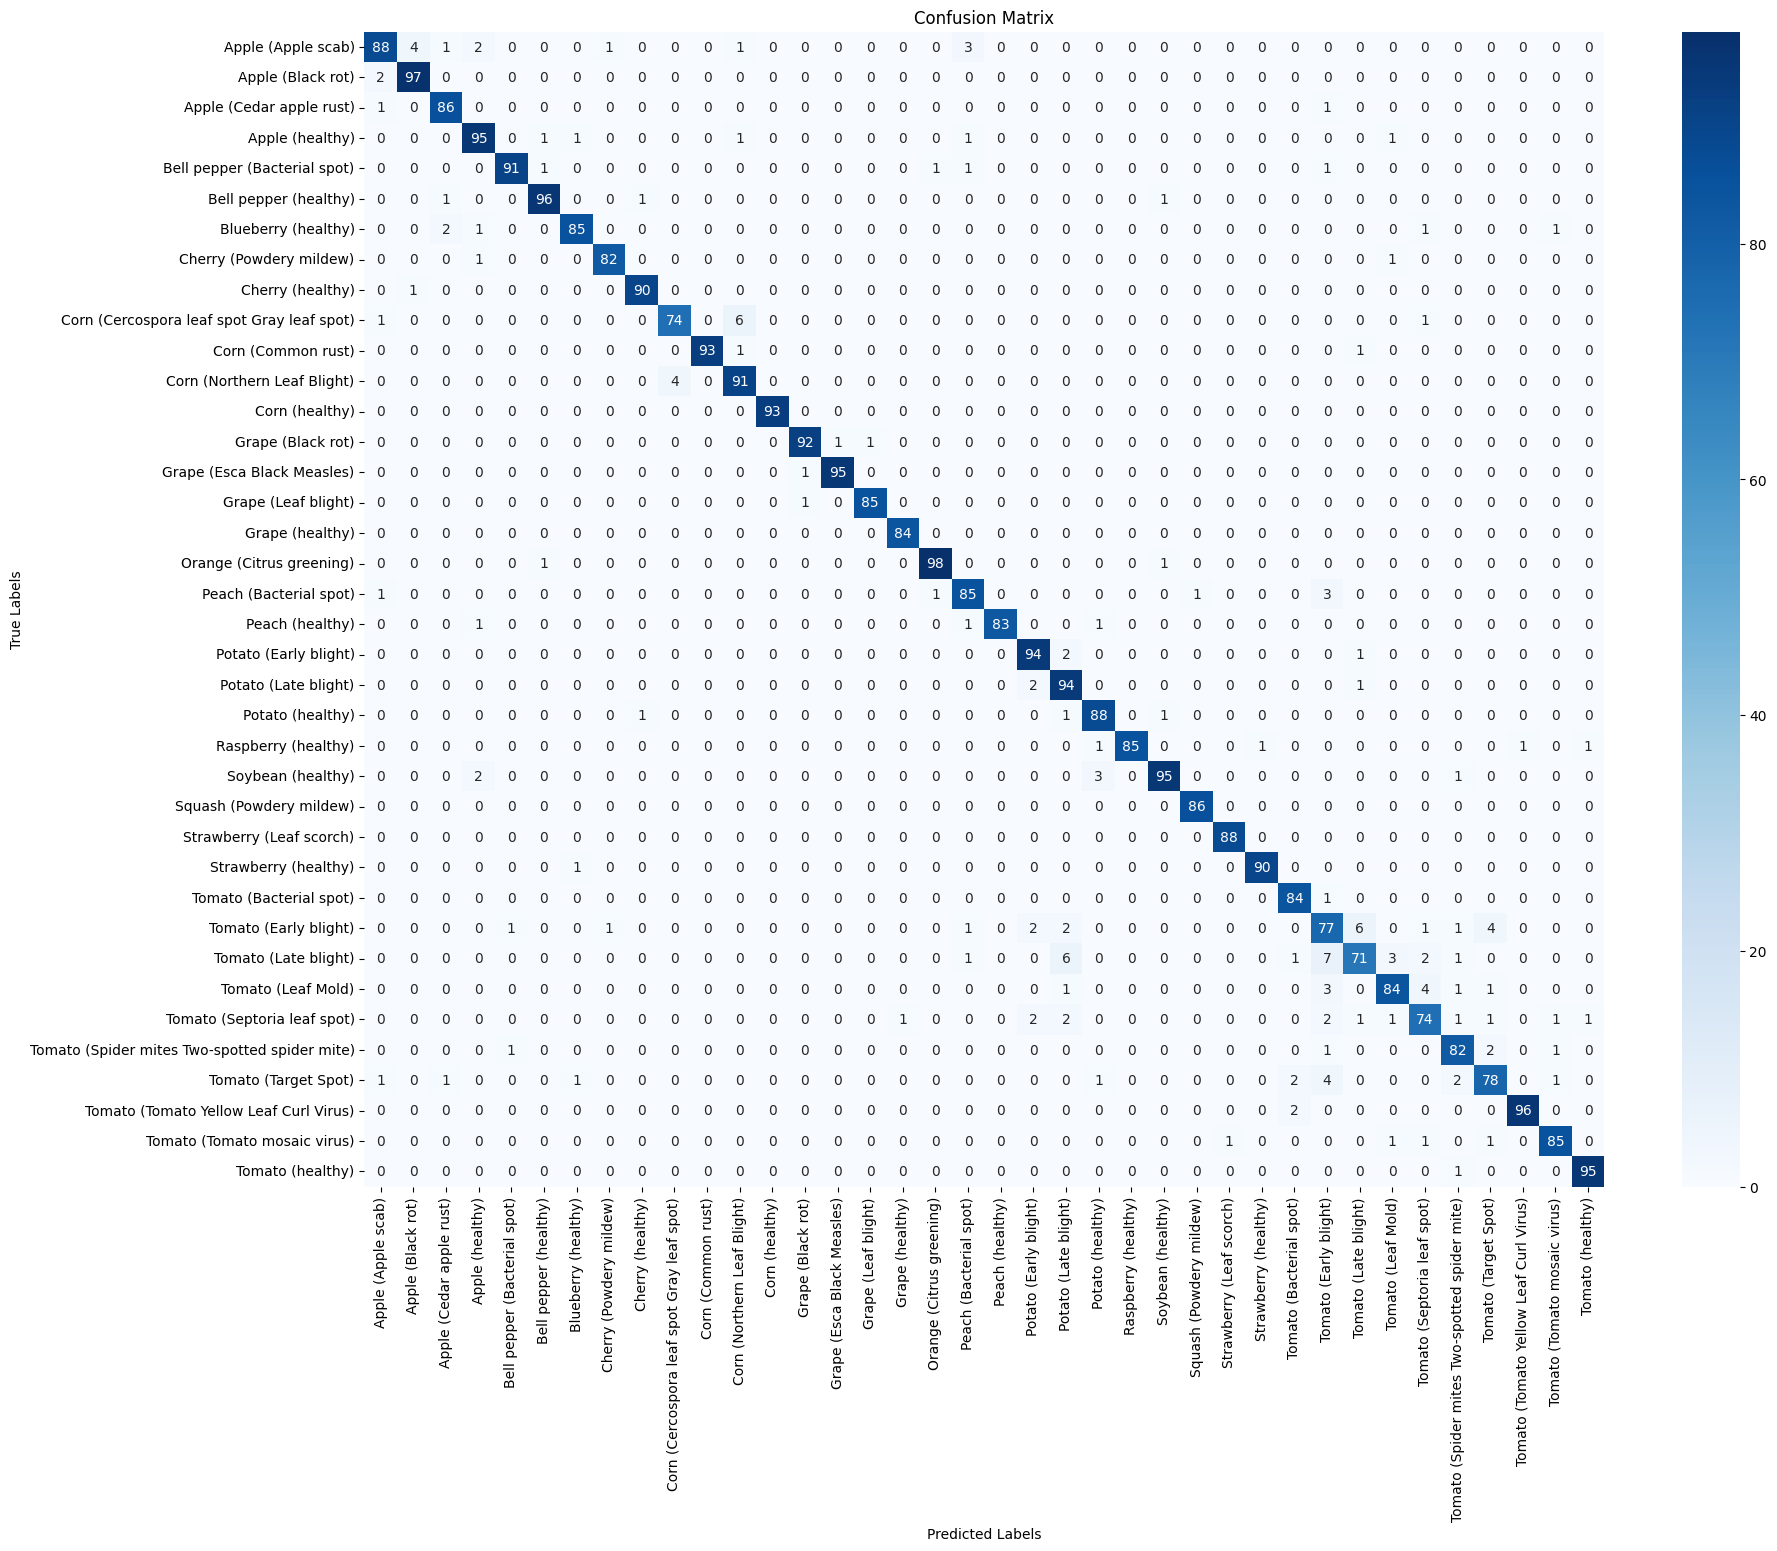

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CONFUSION MATRIX
test_labels_true = np.concatenate([y.numpy() for x, y in test_data], axis=0)

test_predictions = model.predict(test_data)

test_predictions_classes = np.argmax(test_predictions, axis=1)
test_labels_classes = np.argmax(test_labels_true, axis=1)

cm = confusion_matrix(test_labels_classes, test_predictions_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

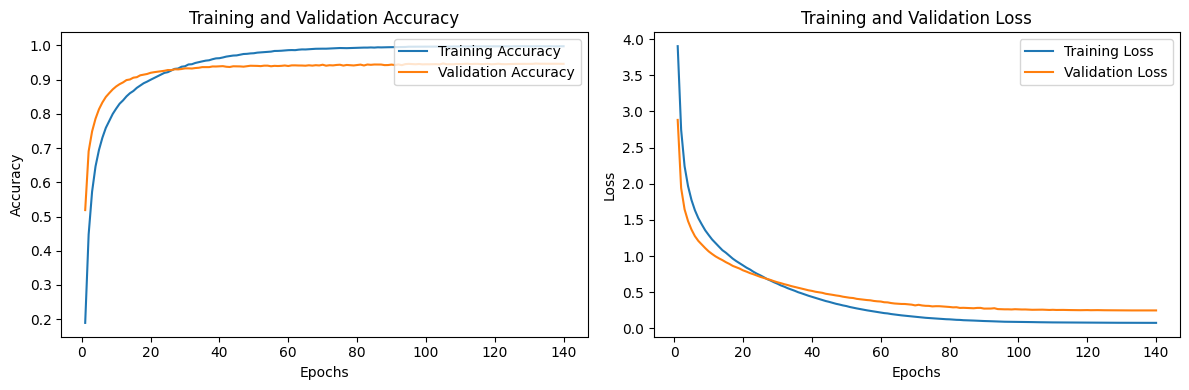

In [14]:
import matplotlib.pyplot as plt

#TRAINING AND VALIDATION COMPARISON
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [15]:
from sklearn.metrics import classification_report

report = classification_report(test_labels_classes, test_predictions_classes, target_names=class_names)
print(report)


                                               precision    recall  f1-score   support

                           Apple (Apple scab)       0.94      0.88      0.91       100
                            Apple (Black rot)       0.95      0.98      0.97        99
                     Apple (Cedar apple rust)       0.95      0.98      0.96        88
                              Apple (healthy)       0.93      0.95      0.94       100
                 Bell pepper (Bacterial spot)       0.98      0.96      0.97        95
                        Bell pepper (healthy)       0.97      0.97      0.97        99
                          Blueberry (healthy)       0.97      0.94      0.96        90
                      Cherry (Powdery mildew)       0.98      0.98      0.98        84
                             Cherry (healthy)       0.98      0.99      0.98        91
   Corn (Cercospora leaf spot Gray leaf spot)       0.95      0.90      0.92        82
                           Corn (Common ru